Step 1: Data preparation

In [1]:
# Import necessary libraries and load the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('239340T_Incident_event_log.csv')
df.head(5)

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


Step 2 - Data cleaning

In [3]:
print("# of incidents in data: " + str(len(df.index)))

# of incidents in data: 119998


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119998 entries, 0 to 119997
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   number                   119998 non-null  object
 1   incident_state           119998 non-null  object
 2   active                   119998 non-null  bool  
 3   reassignment_count       119998 non-null  int64 
 4   reopen_count             119998 non-null  int64 
 5   sys_mod_count            119998 non-null  int64 
 6   made_sla                 119998 non-null  bool  
 7   caller_id                119998 non-null  object
 8   opened_by                119998 non-null  object
 9   opened_at                119998 non-null  object
 10  sys_created_by           119998 non-null  object
 11  sys_created_at           119998 non-null  object
 12  sys_updated_by           119998 non-null  object
 13  sys_updated_at           119998 non-null  object
 14  contact_type        

In [5]:
# Check the data types of the variables
df.dtypes

number                     object
incident_state             object
active                       bool
reassignment_count          int64
reopen_count                int64
sys_mod_count               int64
made_sla                     bool
caller_id                  object
opened_by                  object
opened_at                  object
sys_created_by             object
sys_created_at             object
sys_updated_by             object
sys_updated_at             object
contact_type               object
location                   object
category                   object
subcategory                object
u_symptom                  object
cmdb_ci                    object
impact                     object
urgency                    object
priority                   object
assignment_group           object
assigned_to                object
knowledge                    bool
u_priority_confirmation      bool
notify                     object
problem_id                 object
rfc           

In [6]:
# Check for missing values
df.isnull().sum()

number                     0
incident_state             0
active                     0
reassignment_count         0
reopen_count               0
sys_mod_count              0
made_sla                   0
caller_id                  0
opened_by                  0
opened_at                  0
sys_created_by             0
sys_created_at             0
sys_updated_by             0
sys_updated_at             0
contact_type               0
location                   0
category                   0
subcategory                0
u_symptom                  0
cmdb_ci                    0
impact                     0
urgency                    0
priority                   0
assignment_group           0
assigned_to                0
knowledge                  0
u_priority_confirmation    0
notify                     0
problem_id                 0
rfc                        0
vendor                     0
caused_by                  0
closed_code                0
resolved_by                0
resolved_at   

In [7]:
# Summary statistics of numerical variables
df.describe()

,reassignment_count,reopen_count,sys_mod_count
count,119998.000000,119998.000000,119998.000000
mean,1.151236,0.021025,5.199312
std,1.782823,0.196173,7.804628
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,1.000000,0.000000,3.000000
75%,2.000000,0.000000,7.000000
max,27.000000,8.000000,129.000000


In [8]:
# Count of unique values for categorical variables
df.select_dtypes(include='object').nunique()

number              20769
incident_state          9
caller_id            4829
opened_by             157
opened_at           16349
sys_created_by        150
sys_created_at       9980
sys_updated_by        714
sys_updated_at      41969
contact_type            2
location              203
category               45
subcategory           221
u_symptom             500
cmdb_ci                49
impact                  3
urgency                 3
priority                4
assignment_group       73
assigned_to           209
notify                  2
problem_id            216
rfc                   163
vendor                  5
caused_by               3
closed_code            17
resolved_by           191
resolved_at         15333
closed_at            2013
dtype: int64

In [9]:
df.isnull()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119993,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
119994,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
119995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
119996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


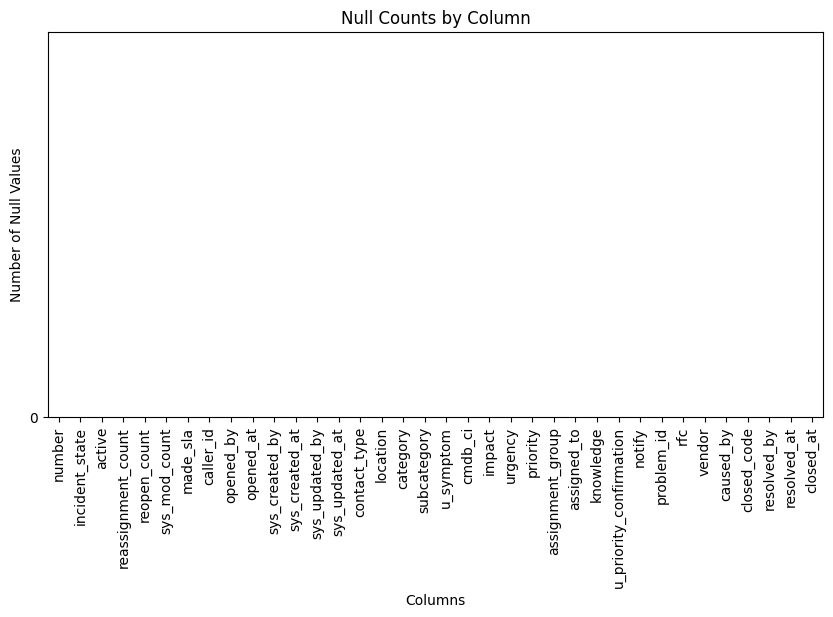

In [10]:
# Check for null values in each column
null_counts = df.isnull().sum()

# Plot the null counts
plt.figure(figsize=(10,5))
null_counts.plot(kind='bar')
plt.title('Null Counts by Column')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.ylim(ymin=0)  # set the lower limit of y-axis to 0
plt.yticks(range(0, max(null_counts)+1, 1), range(0, max(null_counts)+1, 1))  # set y-axis tick values and labels as integers
plt.show()

In [11]:
df = df.drop(['number', 'caller_id', 'sys_created_at', 'sys_updated_at', 'opened_by', 'sys_created_by', 'sys_updated_by', 'cmdb_ci', 'assignment_group', 'assigned_to', 'problem_id', 'rfc', 'vendor', 'caused_by', 'closed_code', 'resolved_by'], axis=1)

In [12]:
# Count of unique values for categorical variables
df.select_dtypes(include='object').nunique()

incident_state        9
opened_at         16349
contact_type          2
location            203
category             45
subcategory         221
u_symptom           500
impact                3
urgency               3
priority              4
notify                2
resolved_at       15333
closed_at          2013
dtype: int64

In [13]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [14]:
#Replace all "?" values with NaN
df.replace('?', np.nan, inplace=True)

#Drop columns with more than 50% missing values
df.dropna(thresh=len(df)*0.5, axis=1, inplace=True)

#Replace missing values in the remaining columns with mode value
for col in df.columns:
    if df[col].isna().sum() > 0:
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)

Step 3: Data Transformation

In [15]:
# Convert 'opened_at' and 'resolved_at' columns to datetime format
df['opened_at'] = pd.to_datetime(df['opened_at'], format='%d/%m/%Y %H:%M')
df['resolved_at'] = pd.to_datetime(df['resolved_at'], format='%d/%m/%Y %H:%M')

# calculate time to resolve in minutes
df['time_to_resolve'] = (df['resolved_at'] - df['opened_at']).dt.total_seconds() / 60

# calculate MTTR based on groupings of 'impact', 'urgency', 'priority', 'incident_state'
df = df.groupby(['impact', 'urgency', 'priority', 'incident_state'])['time_to_resolve'].mean().reset_index()
df.rename(columns={'time_to_resolve': 'mttr'}, inplace=True)

In [16]:
print(df.columns)

Index(['impact', 'urgency', 'priority', 'incident_state', 'mttr'], dtype='object')


Number of outliers: 0


<Axes: xlabel='mttr', ylabel='Count'>

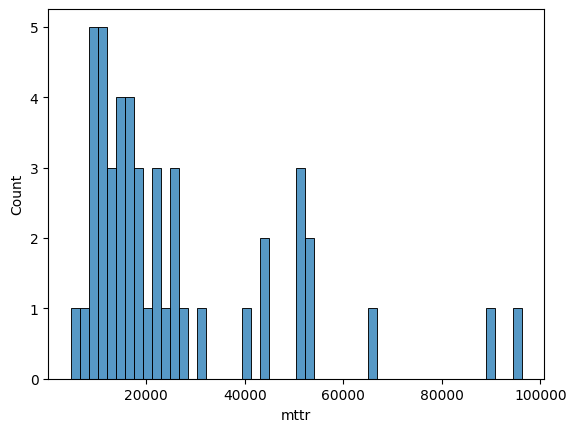

In [17]:
# Calculate IQR
Q1 = df['mttr'].quantile(0.25)
Q3 = df['mttr'].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
df = df[(df['mttr'] >= Q1 - 1.5*IQR) & (df['mttr'] <= Q3 + 1.5*IQR)]

# Find lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print the number of outliers
num_outliers = len(df[(df['mttr'] < lower_bound) | (df['mttr'] > upper_bound)])
print(f"Number of outliers: {num_outliers}")

sns.histplot(data=df, x='mttr', bins=50)

Step 4: Descriptive analysis

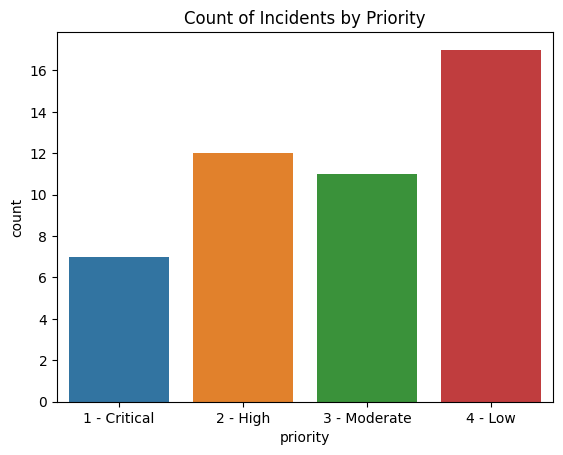

In [18]:
# Count of incidents by priority
sns.countplot(x='priority', data=df)
plt.title('Count of Incidents by Priority')
plt.show()

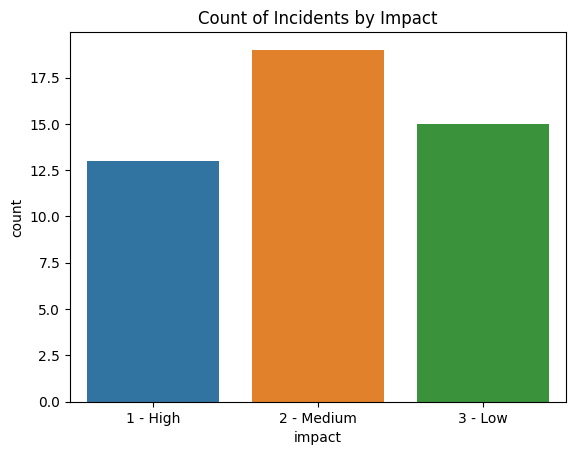

In [19]:
# Count of incidents by impact
sns.countplot(x='impact', data=df)
plt.title('Count of Incidents by Impact')
plt.show()

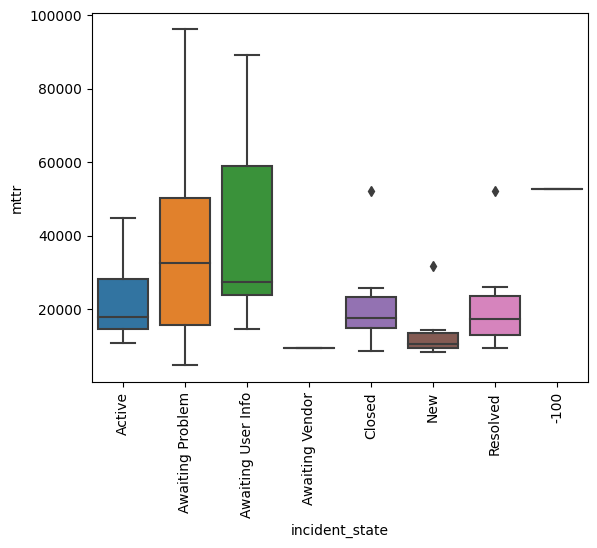

In [20]:
# Visualize the relationship between MTTR and categorical variables
sns.boxplot(data=df, x='incident_state', y='mttr')
plt.xticks(rotation=90)
plt.show()

In [21]:
df = df.drop(df[df['incident_state'] == '-100'].index)

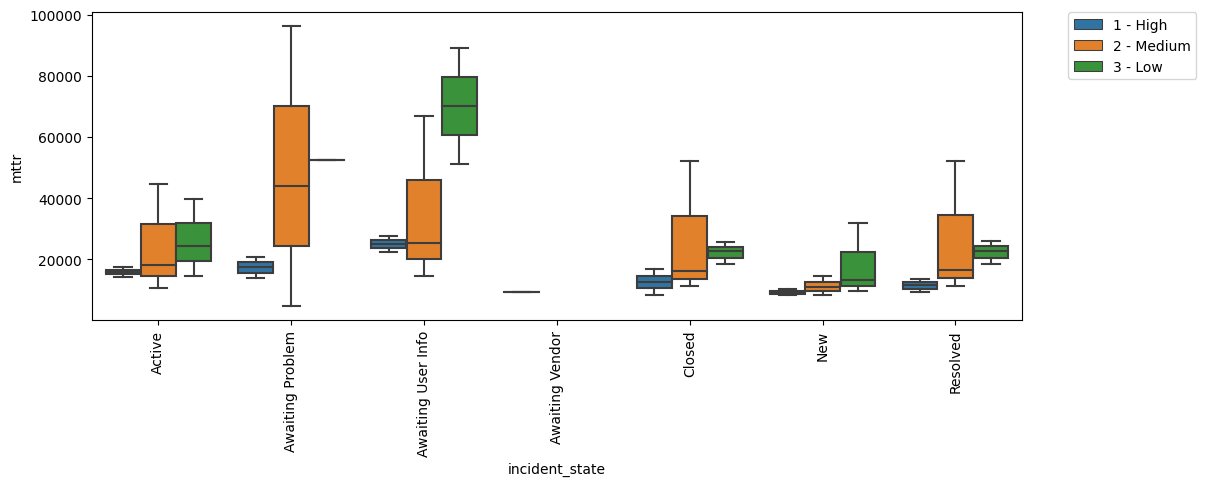

In [22]:
plt.figure(figsize=(12, 4)) # set the figure size
sns.boxplot(data=df, x='incident_state', y='mttr', hue='impact')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=90)
plt.show()

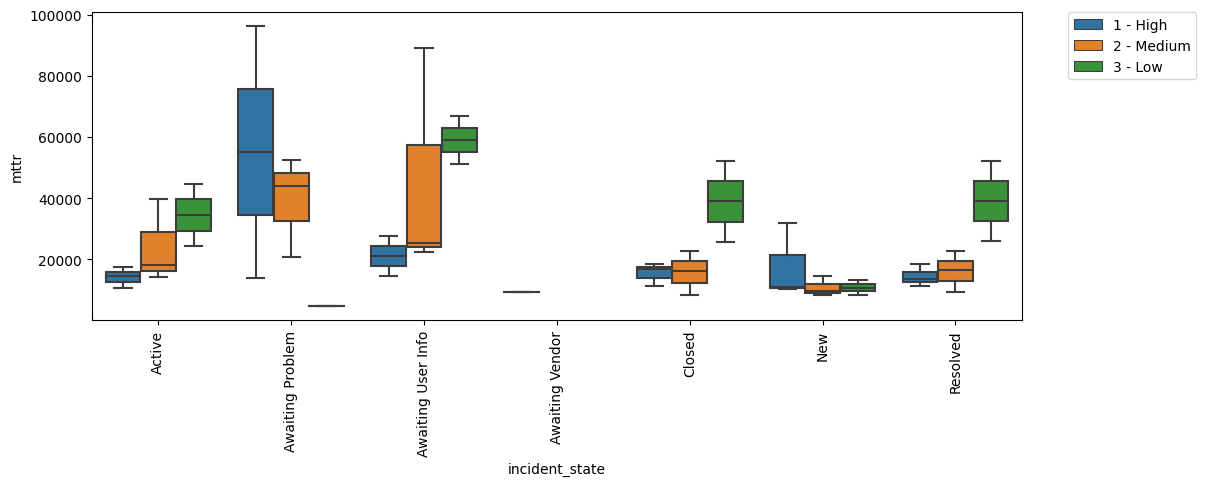

In [23]:
plt.figure(figsize=(12, 4)) # set the figure size
sns.boxplot(data=df, x='incident_state', y='mttr', hue='urgency')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=90)
plt.show()

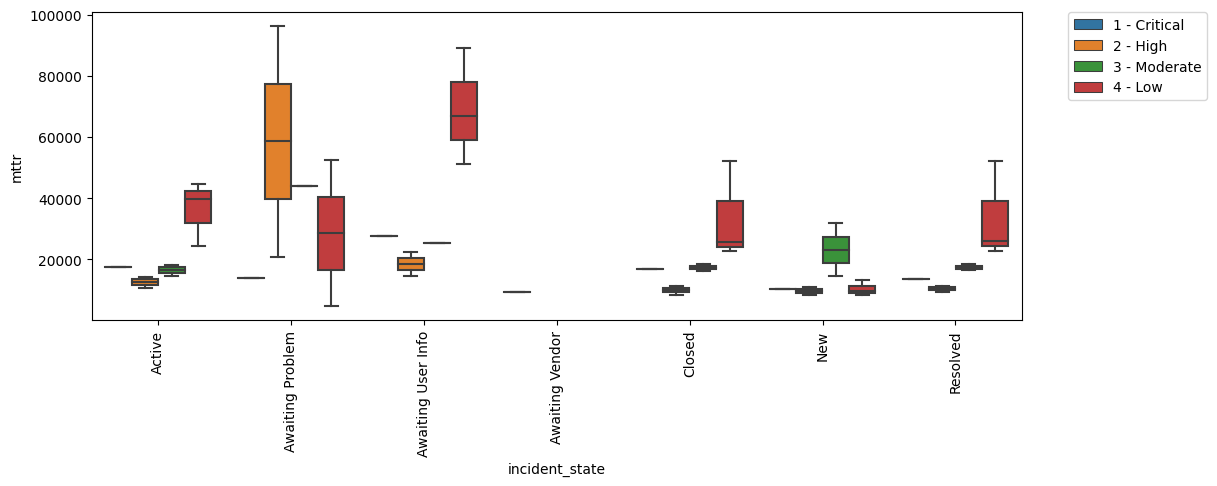

In [24]:
plt.figure(figsize=(12, 4)) # set the figure size
sns.boxplot(data=df, x='incident_state', y='mttr', hue='priority')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=90)
plt.show()

In [25]:
df['impact'] = df['impact'].replace({'1 - High': 1, '2 - Medium': 2, '3 - Low': 3})
df['priority'] = df['priority'].replace({'1 - Critical': 1, '2 - High': 2, '3 - Moderate': 3, '4 - Low': 4})
df['urgency'] = df['urgency'].replace({'1 - High': 1, '2 - Medium': 2, '3 - Low': 3})
df['incident_state'] = df['incident_state'].replace({'New': 1, 'Active': 2, 'Awaiting Problem': 3, 'Awaiting User Info': 4, 'Awaiting Evidence': 5, 'Awaiting Vendor': 6, 'Resolved': 7, 'Closed': 8})
# df['contact_type'] = df['contact_type'].replace({'Phone': 1, 'Email': 2})


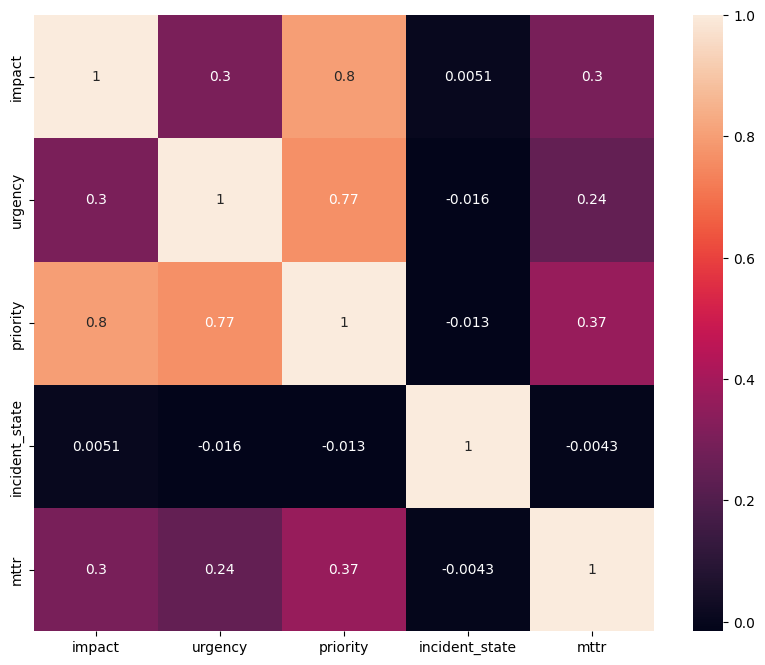

In [26]:
# Visualize the correlation between MTTR and other variables
plt.figure(figsize=(10,8))  # adjust figure size
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [27]:
from prettytable import PrettyTable

# Calculate the correlation between independent variables and Time to Resolve
corr_matrix = df[['impact', 'urgency', 'priority', 'incident_state']].corrwith(df['mttr'])

# Sort the correlations in descending order
sorted_corr = corr_matrix.abs().sort_values(ascending=False)

# Create a table
table = PrettyTable()
table.field_names = ['Independent Variable', 'Correlation with Time To Resolve']

# Add the sorted correlations to the table
for var, corr in sorted_corr.items():
    table.add_row([var, corr])

# Print the table
print(table)



+----------------------+----------------------------------+
| Independent Variable | Correlation with Time To Resolve |
+----------------------+----------------------------------+
|       priority       |       0.36875191352852316        |
|        impact        |        0.2964055477626466        |
|       urgency        |       0.24341313003910808        |
|    incident_state    |      0.0043303238720902425       |
+----------------------+----------------------------------+


In [29]:
from PIL import Image, ImageDraw, ImageFont

# Define table contents
table_data = [
    ['Independent Variable', 'Correlation with Time to Resolve'],
    ['priority', '0.368'],
    ['impact', '0.296'],
    ['urgency', '0.243'],
    ['incident_state', '0.004']
]

# Set table parameters
table_width = 500
col_widths = [250, 250]
row_height = 50
header_bg_color = (255, 255, 255) # white
header_font_color = (0, 0, 0) # black
row_bg_color = (240, 240, 240) # light gray
row_font_color = (0, 0, 0) # black
font_path = "arial.ttf"
font_size = 16

# Create image
num_rows = len(table_data)
table_height = row_height * num_rows
image = Image.new("RGB", (table_width, table_height), (255, 255, 255))
draw = ImageDraw.Draw(image)

# Set font
font = ImageFont.truetype(font_path, font_size)

# Draw table header
x_pos = 0
y_pos = 0
for i, header in enumerate(table_data[0]):
    cell_width = col_widths[i]
    cell_height = row_height
    draw.rectangle((x_pos, y_pos, x_pos+cell_width, y_pos+cell_height), fill=header_bg_color, outline=(0, 0, 0))
    draw.text((x_pos+5, y_pos+5), header, font=font, fill=header_font_color)
    x_pos += cell_width

# Draw table rows
x_pos = 0
y_pos += row_height
for i in range(1, num_rows):
    for j, cell in enumerate(table_data[i]):
        cell_width = col_widths[j]
        cell_height = row_height
        draw.rectangle((x_pos, y_pos, x_pos+cell_width, y_pos+cell_height), fill=row_bg_color, outline=(0, 0, 0))
        draw.text((x_pos+5, y_pos+5), cell, font=font, fill=row_font_color)
        x_pos += cell_width
    x_pos = 0
    y_pos += row_height

# Save image
image.save("correlation_table.png")


Step 5: Predictive analysis

In [30]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X = df[['impact', 'urgency', 'priority', 'incident_state']]
y = df['mttr']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
# Train linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
r2_lin = r2_score(y_test, y_pred)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred))

print('R-squared:', r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))


R-squared: 0.1378924513623334
RMSE: 14952.98094768363


In [32]:
# Train KNN model
from sklearn.neighbors import KNeighborsRegressor

knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)
y_pred = knn_regressor.predict(X_test)
r2_knn = r2_score(y_test, y_pred)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred))

print('KNN R-squared:', r2_knn)
print('KNN RMSE:', rmse_knn)

KNN R-squared: 0.3679445912575434
KNN RMSE: 12803.379903056606


In [33]:
# Train random forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)
r2_rf = r2_score(y_test, y_pred)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred))

print('R-squared:', r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R-squared: 0.5845778709869652
RMSE: 10379.868931274128


In [34]:
# Train decision tree model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)
y_pred = dt_regressor.predict(X_test)
r2_dt = r2_score(y_test, y_pred)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred))

print('R-squared:', r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R-squared: -0.8034457106633206
RMSE: 21627.11515462145


In [35]:
# Select the best model based on R-squared and RMSE
best_model = 'Linear Regression' if r2_lin > r2_dt and r2_lin > r2_rf and r2_lin > r2_knn else 'Decision Tree' if r2_dt > r2_rf and r2_dt > r2_knn else 'Random Forest' if r2_rf > r2_knn else 'KNN'
print('Best model:', best_model)

Best model: Random Forest


In [36]:
if best_model == 'Linear Regression':
    y_pred = regressor.predict(X_test)
elif best_model == 'Decision Tree':
    y_pred = dt_regressor.predict(X_test)
elif best_model == 'KNN':
    y_pred = dt_regressor.predict(X_test)
else:
    y_pred = rf_regressor.predict(X_test)

In [37]:
print('R-squared:', r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R-squared: 0.5845778709869652
RMSE: 10379.868931274128


In [38]:
from sklearn.model_selection import GridSearchCV

if best_model == 'Linear Regression':
    # No hyperparameters to tune for linear regression
    pass
elif best_model == 'Decision Tree':
    # Fine-tune hyperparameters for decision tree using grid search and cross-validation
    param_grid = {'max_depth': [2, 4, 6, 8, 10]}
    grid_search = GridSearchCV(dt_regressor, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    dt_regressor = DecisionTreeRegressor(max_depth=best_params['max_depth'], random_state=0)
elif best_model == 'Random Forest':
    # Fine-tune hyperparameters for random forest using grid search and cross-validation
    param_grid = {'n_estimators': [50, 100, 200, 500],
                  'max_depth': [2, 4, 6, 8, 10]}
    grid_search = GridSearchCV(rf_regressor, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    rf_regressor = RandomForestRegressor(n_estimators=best_params['n_estimators'], 
                                          max_depth=best_params['max_depth'], random_state=0)
    
    rf_regressor.fit(X_train, y_train)

    # Evaluate the performance of the model with optimized hyperparameters on the testing set
    y_pred = rf_regressor.predict(X_test)
    print('R-squared:', r2_score(y_test, y_pred))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))


R-squared: 0.5895442657971965
RMSE: 10317.636416620846


In [39]:
from PIL import Image, ImageDraw, ImageFont

# Define table contents
table_data = [
    ['R-squared (Before fine-tune)', 'R-squared (After fine-tune)'],
    ['0.584', '0.589']
]

# Set table parameters
table_width = 500
col_widths = [250, 250]
row_height = 50
header_bg_color = (255, 255, 255) # white
header_font_color = (0, 0, 0) # black
row_bg_color = (240, 240, 240) # light gray
row_font_color = (0, 0, 0) # black
font_path = "arial.ttf"
font_size = 16

# Create image
num_rows = len(table_data)
table_height = row_height * num_rows
image = Image.new("RGB", (table_width, table_height), (255, 255, 255))
draw = ImageDraw.Draw(image)

# Set font
font = ImageFont.truetype(font_path, font_size)

# Draw table header
x_pos = 0
y_pos = 0
for i, header in enumerate(table_data[0]):
    cell_width = col_widths[i]
    cell_height = row_height
    draw.rectangle((x_pos, y_pos, x_pos+cell_width, y_pos+cell_height), fill=header_bg_color, outline=(0, 0, 0))
    draw.text((x_pos+5, y_pos+5), header, font=font, fill=header_font_color)
    x_pos += cell_width

# Draw table rows
x_pos = 0
y_pos += row_height
for i in range(1, num_rows):
    for j, cell in enumerate(table_data[i]):
        cell_width = col_widths[j]
        cell_height = row_height
        draw.rectangle((x_pos, y_pos, x_pos+cell_width, y_pos+cell_height), fill=row_bg_color, outline=(0, 0, 0))
        draw.text((x_pos+5, y_pos+5), cell, font=font, fill=row_font_color)
        x_pos += cell_width
    x_pos = 0
    y_pos += row_height

# Save image
image.save("finetune_table.png")

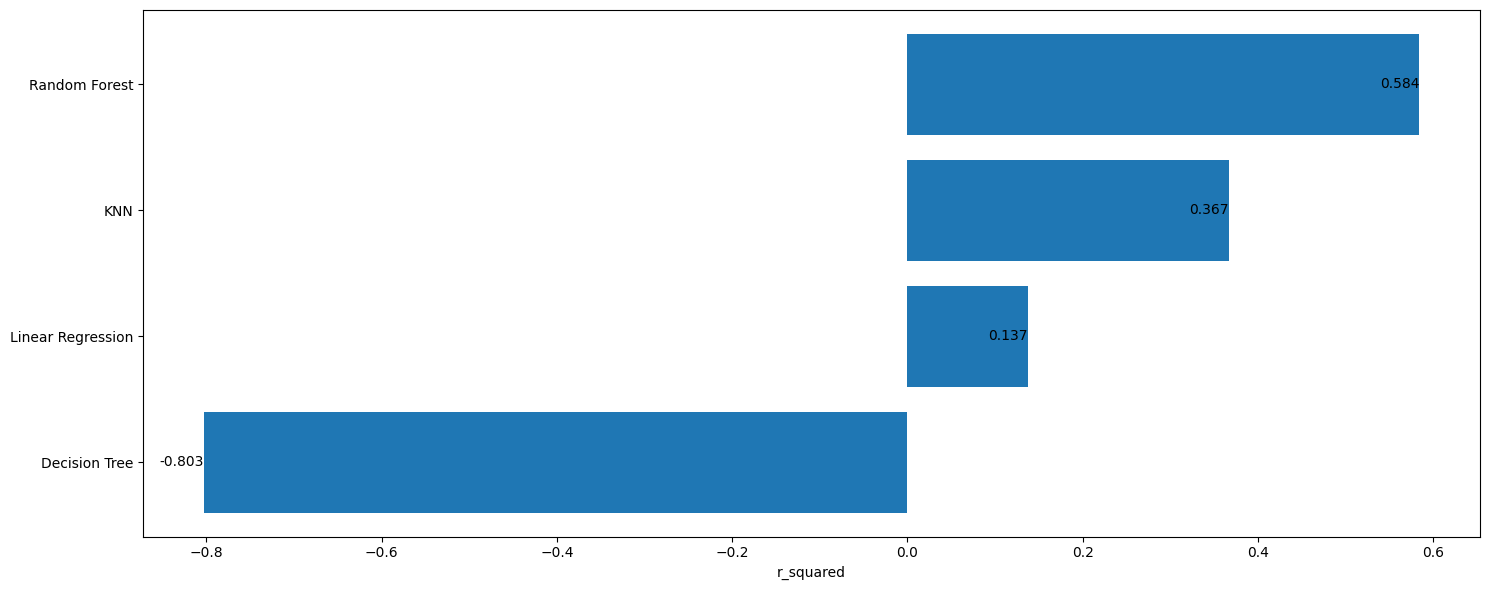

In [43]:
# Define the R Squared and model names
r_squared = [-0.803, 0.137, 0.367, 0.584]
models = ['Decision Tree', 'Linear Regression', 'KNN', 'Random Forest']

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(15, 6))
ax.barh(models, r_squared)

# Set the x-axis label
ax.set_xlabel('r_squared')

# Add the RMSE values as text on the chart
for i in range(len(models)):
    ax.text(1*r_squared[i], i, str(r_squared[i]), ha='right', va='center', color='black')

# Display the chart
plt.tight_layout()
plt.show()